# IS 4487 Lab 7

## Outline

Begin where you left on in Lab 7 with the *SuperStore Retail Orders* dataset

In this lab, your assignment is to do a regression model to predict sales revenue.  You can focus your efforts on predicting sales by month and product line.  

<a href="https://colab.research.google.com/github/Stan-Pugsley/is_4487_base/blob/main/Labs/Scripts/lab12_retailer_tune_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## Load Libraries

➡️ Assignment Tasks
- Load any necessary libraries

In [27]:
from google.colab import drive
drive.mount('/content/drive')

!cp "/content/drive/MyDrive/Colab Notebooks/lab12_retailer_tune_model.ipynb"  ./
!jupyter nbconvert --to html "/content/drive/MyDrive/Colab Notebooks/lab12_retailer_tune_model.ipynb"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
cp: cannot stat '/content/drive/MyDrive/Colab Notebooks/lab12_retailer_tune_model.ipynb': No such file or directory
[NbConvertApp] WARNING | pattern '/content/drive/MyDrive/Colab Notebooks/lab12_retailer_tune_model.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration

In [1]:
import pandas as pd
import matplotlib as mpl
import sklearn as sl
import matplotlib.pyplot as plt
import seaborn as sns

## Import Data into Dataframe

➡️ Assignment Tasks
- Import data from the SuperStore retail dataset into a dataframe (in GitHub go to Labs > DataSets)
- Describe or profile the dataframe

In [2]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

df = pd.read_csv (r'/content/superstore_retail_orders (1).csv')

df.info()

df.describe()

Mounted at /content/gdrive
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56045 entries, 0 to 56044
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          56045 non-null  int64  
 1   order_date        56013 non-null  object 
 2   order_year_month  56013 non-null  object 
 3   customer_name     56045 non-null  object 
 4   city              55571 non-null  object 
 5   state_province    55571 non-null  object 
 6   quantity          56006 non-null  float64
 7   product_name      56045 non-null  object 
 8   product_line      56045 non-null  object 
 9   product_price     56045 non-null  float64
dtypes: float64(2), int64(1), object(7)
memory usage: 4.3+ MB


,order_id,quantity,product_price
count,56045.000000,56006.000000,56045.000000
mean,61668.066340,3.348498,6195.540505
std,7508.229651,422.646565,35784.727716
min,45079.000000,1.000000,2.290000
25%,55644.000000,1.000000,7.950000
50%,61869.000000,1.000000,475.600000
75%,68097.000000,2.000000,914.620000
max,74147.000000,100000.000000,235481.000000


## Prepare Data

➡️ Assignment Tasks
- Create any needed variables, such as month of year and total_amount.  
- Filter out any incomplete orders

In [3]:
#filter records
df_clean = df.dropna()
categorical_cols = df.select_dtypes(include='object').columns
df[categorical_cols] = df[categorical_cols].astype('category')
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 55500 entries, 0 to 56044
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          55500 non-null  int64  
 1   order_date        55500 non-null  object 
 2   order_year_month  55500 non-null  object 
 3   customer_name     55500 non-null  object 
 4   city              55500 non-null  object 
 5   state_province    55500 non-null  object 
 6   quantity          55500 non-null  float64
 7   product_name      55500 non-null  object 
 8   product_line      55500 non-null  object 
 9   product_price     55500 non-null  float64
dtypes: float64(2), int64(1), object(7)
memory usage: 4.7+ MB


In [4]:
#number conversion
from scipy import stats
z_scores = stats.zscore(df_clean.select_dtypes(include=['int', 'float']))
abs_z_scores = abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
df_clean = df_clean[filtered_entries]


df_clean['total_amount'] = df_clean['quantity'] * df_clean['product_price']
df_clean['city'] = df_clean['city'].fillna("n/a")
print(df_clean.info())
print(df_clean.describe())

import pandas as pd
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

df = pd.read_csv('/content/superstore_retail_orders (1).csv')

df_clean = df.dropna()

categorical_cols = df.select_dtypes(include='object').columns
df[categorical_cols] = df[categorical_cols].astype('category')

from scipy import stats
z_scores = stats.zscore(df_clean.select_dtypes(include=['int', 'float']))
abs_z_scores = abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
df_clean = df_clean[filtered_entries]

df_clean['total_amount'] = df_clean['quantity'] * df_clean['product_price']

df_clean['city'] = df_clean['city'].fillna("n/a")

df_clean['month'] = df_clean['order_year_month'].apply(lambda x: int(x.split('-')[1]))

print(df_clean.info())
print(df_clean.describe())


<ipython-input-4-a0c699b7130f>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['total_amount'] = df_clean['quantity'] * df_clean['product_price']
<ipython-input-4-a0c699b7130f>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['city'] = df_clean['city'].fillna("n/a")


<class 'pandas.core.frame.DataFrame'>
Index: 54172 entries, 0 to 56044
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          54172 non-null  int64  
 1   order_date        54172 non-null  object 
 2   order_year_month  54172 non-null  object 
 3   customer_name     54172 non-null  object 
 4   city              54172 non-null  object 
 5   state_province    54172 non-null  object 
 6   quantity          54172 non-null  float64
 7   product_name      54172 non-null  object 
 8   product_line      54172 non-null  object 
 9   product_price     54172 non-null  float64
 10  total_amount      54172 non-null  float64
dtypes: float64(3), int64(1), object(7)
memory usage: 5.0+ MB
None
           order_id      quantity  product_price  total_amount
count  54172.000000  54172.000000   54172.000000  5.417200e+04
mean   61642.049103      1.516134     614.104032  7.635611e+02
std     7518.886689      3.53

## Visualize Data

➡️ Assignment Tasks
- Create at least 2 plots showing total revenue (quantity * price) by other variables (see Lab 7).

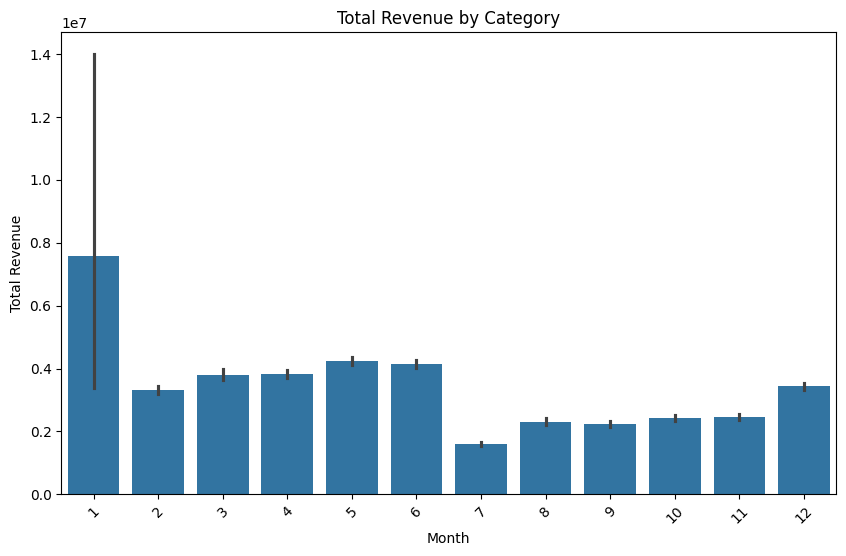

<class 'pandas.core.frame.DataFrame'>
Index: 54172 entries, 0 to 56044
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          54172 non-null  int64  
 1   order_date        54172 non-null  object 
 2   order_year_month  54172 non-null  object 
 3   customer_name     54172 non-null  object 
 4   city              54172 non-null  object 
 5   state_province    54172 non-null  object 
 6   quantity          54172 non-null  float64
 7   product_name      54172 non-null  object 
 8   product_line      54172 non-null  object 
 9   product_price     54172 non-null  float64
 10  total_amount      54172 non-null  float64
 11  month             54172 non-null  int64  
 12  order_year        54172 non-null  int64  
dtypes: float64(3), int64(3), object(7)
memory usage: 5.8+ MB
None


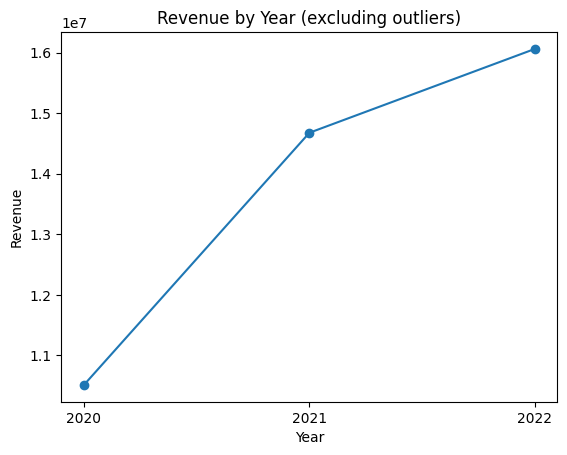

In [5]:
#plots

plt.figure(figsize=(10, 6))
sns.barplot(x='month', y='total_amount', data=df_clean, estimator=sum)
plt.title('Total Revenue by Category')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.show()

df_clean['order_year'] = df_clean['order_year_month'].apply(lambda x: int(x.split('-')[0]))

print(df_clean.info())

df_clean_filtered = df_clean[(df_clean['order_year'] >= 2020) & (df_clean['order_year'] <= 2022)]

revenue_by_year = df_clean_filtered.groupby('order_year')['total_amount'].sum()

plt.plot(revenue_by_year.index, revenue_by_year.values, marker='o')
plt.xlabel('Year')
plt.ylabel('Revenue')
plt.title('Revenue by Year (excluding outliers)')
plt.xticks(revenue_by_year.index)
plt.show()


## Regression

For more info on regression models, see: https://towardsdatascience.com/simple-and-multiple-linear-regression-in-python-c928425168f9

➡️ Assignment Tasks
- create a linear regression to predict the total revenue (quantity * price). Use ONLY ONE of the independent variables, such as month of the year
- Output your coefficients

In [12]:
#create model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

X = df_clean[['month']]
y = df_clean['total_amount']

model = LinearRegression()
model.fit(X, y)


LinearRegression()

In [11]:
#display coefficients

print("Coefficients:", model.coef_)

y_pred = model.predict(X)

r_squared = model.score(X, y)
print("R-squared value:", r_squared)

Coefficients: [-2.25379851e+01 -1.71936387e+00  3.14943205e+03]
R-squared value: 0.8983917118532461


## Regression - Improved

➡️ Assignment Tasks
- create a linear regression to predict the total revenue (quantity * price). Use at least two more independent variables (see varabiables from Lab 7)
- Output your coefficients
- Did your R2 value improve (better fit)?

In [13]:
#create model

X = df_clean[['month', 'order_year', 'quantity']]
y = df_clean['total_amount']

model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [14]:
print("Coefficients:", model.coef_)

Coefficients: [-2.25379851e+01 -1.71936387e+00  3.14943205e+03]


In [15]:
y_pred = model.predict(X)

r_squared = r2_score(y, y_pred)
print("R-squared value:", r_squared)

R-squared value: 0.8983917118532461


## One-Hot Product

➡️ Assignment Tasks
- Create one-hot/dummy encoding for the product line variable.  Use those new encoded variables for the regression

In [22]:
#create variable
df_encoded = pd.get_dummies(df_clean, columns=['product_line'], drop_first=True)

print(df_encoded.head())

X_encoded = df_encoded[['month', 'order_year', 'quantity', 'product_line_Electronics', 'product_line_Laptop', 'product_line_Mobile', 'product_line_OfficeProducts', 'product_line_Projector']]
y_encoded = df_encoded['total_amount']

   order_id  order_date order_year_month  customer_name               city  \
0     51188  2021-07-01          2021-07  Audrey Blanco  North Cherylmouth   
1     51187  2021-07-01          2021-07    Isaac Allen         Traceyland   
2     51199  2021-07-02          2021-07     Ian Morgan          Dylanberg   
3     51241  2021-07-04          2021-07     Alexa Bell     Lake Tracytown   
4     51297  2021-07-08          2021-07     Casey Diaz        Byrdchester   

              state_province  quantity  \
0  NEW HAMPSHIRE                   3.0   
1  WEST VIRGINIA                   4.0   
2  SOUTH DAKOTA                    5.0   
3  WISCONSIN                       1.0   
4  MISSISSIPPI                     1.0   

                                        product_name  product_price  \
0  Apple iPhone XR (Yellow, 256 GB) (Includes Ear...         649.99   
1  Apple iPhone XR (Yellow, 256 GB) (Includes Ear...         649.99   
2  Apple iPhone XR (Yellow, 256 GB) (Includes Ear...         649.

In [23]:
#create model
model_encoded = LinearRegression()
model_encoded.fit(X_encoded, y_encoded)

print("Coefficients:", model_encoded.coef_)

Coefficients: [-4.52311636e+00 -9.37259803e-01  3.15211164e+03  8.64750325e+02
  5.06386876e+03  2.17080618e+03 -2.00841297e+03  5.16089107e+03]


In [24]:
#display coefficients
y_pred_encoded = model_encoded.predict(X_encoded)

r_squared_encoded = r2_score(y_encoded, y_pred_encoded)
print("R-squared value with encoded variables:", r_squared_encoded)

R-squared value with encoded variables: 0.9047428169895343
